# Creating and saving a randomly generated task dataset 

### Imports

In [1]:
import sys
sys.path.append('../')

from cognitive import constants as const
from cognitive.auto_task import auto_task_util as auto_task
import os
import glob
import json
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
%matplotlib inline

### Parameter Initialization

- Here we initialize the parameters which control the random task generation

In [5]:
max_op = 15 # the depth of the task graph
max_depth = 5 # the maximum number of operators in the task
max_switch = 1 # the maximum number of switch operators in the task graph
select_limit = True
switch_threshold = 0.3 # chance to add switch operator 
boolean_ops = ["IsSame", "And"] # possible boolean operators for the task
output_dir = 'outputs/trials' # the output directory
stim_dir = '../data/shapenet_handpicked_val' # stimulus set
n_tasks = 10 # number of tasks to be generated

const.DATA = const.Data(dir_path=stim_dir, train=False)
op_dict = auto_task.op_dict

# Create the output directory
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

- Generate the random tasks and write them to the output directory

In [6]:
import time

times = []

for i in range(n_tasks):
    task_graph, task = auto_task.task_generator(max_switch,
                                        switch_threshold,
                                        max_op,
                                        max_depth,
                                        select_limit)

    fp = os.path.join(output_dir, 'trial' + str(i))

    auto_task.write_trial_instance(task[1], fp, 224, True)

instruction  observe object 1, observe object 2, observe object 3, location of object 2 equals top right or identity of object 1 equals identity of object 3?
answers:  ['null', 'null', 'false']


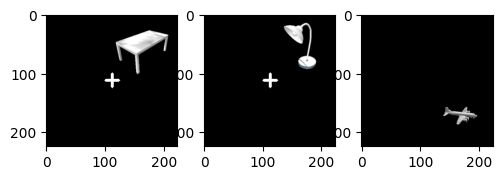

In [7]:
# display trial frame sequence
images = []
for img_path in sorted(glob.glob('outputs/trials/trial7/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
with open('outputs/trials/trial7/trial_info') as f:
    trial_info = json.load(f)
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])

In [8]:
import networkx as nx

task_graph, task = auto_task.task_generator(max_switch,
                                    switch_threshold,
                                    max_op,
                                    max_depth,
                                    select_limit)   



# G = task.to_graph()
# task[1].draw_graph('rand_task_.png', task_graph)
G, _, _ = task_graph
G = G.reverse()

A = nx.nx_agraph.to_agraph(G)
A.draw(os.path.join("operator_graph.png"), prog="dot")

fp = os.path.join(output_dir, 'trial')
auto_task.write_trial_instance(task[1], fp, 224, True)

In [9]:
task[1].to_json('comp_loc_task_.json')

{'n_frames': 2,
 'first_shareable': 0,
 'avg_mem': 3,
 'whens': {1: 'last1'},
 'operator': {'name': 'GetLoc',
  'child': [{'name': 'Select',
    'child': [{'name': 'Loc', 'value': None},
     {'name': 'SNCategory', 'value': None},
     {'name': 'SNObject',
      'value': None,
      'category': {'name': 'SNCategory', 'value': None}},
     {'name': 'SNViewAngle',
      'value': None,
      'sn_object': {'name': 'SNObject',
       'value': None,
       'category': {'name': 'SNCategory', 'value': None}}}],
    'when': 'last1'}]}}